# Análise dos Dados do Booking - *Portugal*

- Baixe o arquivo no link: [Clique aqui para baixar o arquivo](https://drive.google.com/file/d/1ApHNm3gI7O7j7Kby7EU9xZo7W1E8xB6t/view?usp=drive_link)



# A [Booking.com](https://www.booking.com/) é uma das **maiores plataformas de reservas de hospedagem do mundo**. E o mais impressionante? Ela **não é dona de nenhum hotel**!

Conectando viajantes a uma vasta rede de hotéis, pousadas, apartamentos e outras opções de hospedagem, a Booking.com revolucionou a forma como as pessoas planejam suas viagens, oferecendo **milhões de propriedades em todo o mundo**.

Fundada em 1996, a empresa já ajudou **milhões de viajantes** a encontrar a hospedagem perfeita, desbancando métodos tradicionais de reserva e se tornando referência no setor de turismo.

A Booking.com também disponibiliza dados e ferramentas para desenvolvedores através da [Booking.com API](https://developers.booking.com/), permitindo a integração de suas soluções de hospedagem em outros aplicativos e plataformas.

<center>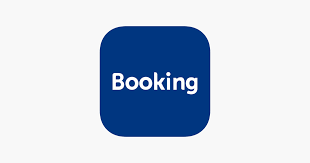</center>

**Neste *notebook*, vamos explorar dados de hospedagens em Lisboa e descobrir insights valiosos sobre tendências de viagem, preços e disponibilidade.**

**Dicionário das variáveis**

* **id** : identificação única para o anúncio
* **name** : nome do anúncio
* **host_id** : identificador único para o proprietário do imóvel
* **host_name** : nome do proprietário
* **neighbourhood_group** :município ao qual o imóvel pertence, geolocalizado pelas coordenadas de latitude e longitude
* **neighbourhood** : bairro da propriedade
* **latitude** : coordenada geográfica de latitude da propriedade
* **longitude** : coordenada geográfica de longitude da propriedade
* **room_type** : tipo de quarto oferecido para locação
* **price** : preço da diária do aluguel
* **minimum_nights** : quantidade mínima de noites para alugar o imóvel
* **number_of_reviews** : quantidade de avaliações que o imóvel tem
* **last_review** : data da última avaliação
* **reviews_per_month** : quantidade de avaliações por mês
* **calculated_host_listings_count** : quantidade de imóveis do mesmo proprietário na mesma cidade/região
* **availability_365** : número de dias disponíveis para locação nos próximos 365 dias
* **number_of_reviews_ltm** : quantidade de avaliações nos últimos 12 meses
* **license** : número de registro do imóvel

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid", palette='rocket')
#sns.color_palette("flare", as_cmap=True)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/DATA_SCIENCE"

Mounted at /content/drive


## Análise dos Dados


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [11]:
# Leitura do arquivo
df = pd.read_csv(path + '/booking_portugal.csv', sep=',')

# Mostrando as 10 primeiras linhas
df.head(10)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,50633912,Dawn by Tejo apartment,162544509,Rita,Lisboa,Misericrdia,38.68451,-9.14721,Entire home/apt,140,6,9,2022-05-12,0.94,2,48,9,117958/AL
1,26228173,"Double or single room in Cacilhas, Almada.",190814174,Expandavenue,Lisboa,Misericrdia,38.68663,-9.14882,Private room,25,3,52,2022-05-31,1.08,10,169,9,nº 73403/AL
2,626948758397201007,Private Bedroom | Short Board | AtelierSurf29,401590803,Alain,Lisboa,Estrela,38.67714,-9.15887,Private room,34,3,4,2022-06-08,4.00,4,339,4,125224/AL
3,50739035,"Comfortable, Fully Equipped and Home-office Ready",46289990,Daniel,Lisboa,Estrela,38.67610,-9.16045,Entire home/apt,65,2,15,2022-04-30,1.60,1,54,15,118900/AL
4,27597765,Cacilhas AMAZING view of Lisbon+ beaches Caparica,8595303,Gina,Lisboa,Estrela,38.68435,-9.15006,Entire home/apt,82,3,4,2018-10-01,0.09,3,306,0,80019/AL
5,39947844,Double Room Yellow Private WC - Estrela do Almada,8141673,Ana,Lisboa,Estrela,38.68240,-9.15682,Private room,35,2,18,2022-05-26,0.65,2,25,12,102730/AL
6,29006708,Tagus South Bank Flat in Cacilhas - Almada,218624588,Vitor,Lisboa,Estrela,38.68508,-9.14995,Entire home/apt,51,3,14,2021-09-05,0.33,1,158,4,81544AL
7,34728174,Casa Rosa,161548729,Alain Et Rosália,Lourinh,Lourinh e Atalaia,39.30797,-9.33758,Private room,50,2,8,2021-09-06,0.23,1,347,2,Exempt
8,46017059,Nice Room-Almada Velha,271978183,Dariane,Lisboa,Estrela,38.67997,-9.16258,Private room,23,2,21,2022-06-09,1.20,2,140,18,Exempt
9,33866777,Casa do Alfaiate ® Home&Breakfast,27100448,Edgar E Simão,Lisboa,Estrela,38.68294,-9.16056,Entire home/apt,64,2,73,2022-05-21,1.94,1,132,25,95605/AL


In [10]:
print(f'O dataset possui {df.shape[0]} entradas (registros) e {df.shape[1]} atributos (variáveis).')

# Tipos de dados dos atributos
print(f'\nOs tipos dos atributos são do tipo:\n{df.dtypes}')

O dataset possui 18929 entradas (registros) e 18 atributos (variáveis).

Os tipos dos atributos são do tipo:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [7]:
print(f'As variáveis com mais dados faltantes, em porcentagem (%), são:\n')
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

As variáveis com mais dados faltantes, em porcentagem (%), são:



,0
reviews_per_month,12.858577
last_review,12.858577
license,7.750013
name,0.042263
id,0.000000
host_id,0.000000
latitude,0.000000
host_name,0.000000
neighbourhood_group,0.000000
neighbourhood,0.000000


As variaveis com maior valor faltante são reviews_per_month com 12,86% | last_review com 12,86%¨| license com 7,75% | name com 0,04%

### **Q3. Qual o tipo de distribuição das variáveis?**

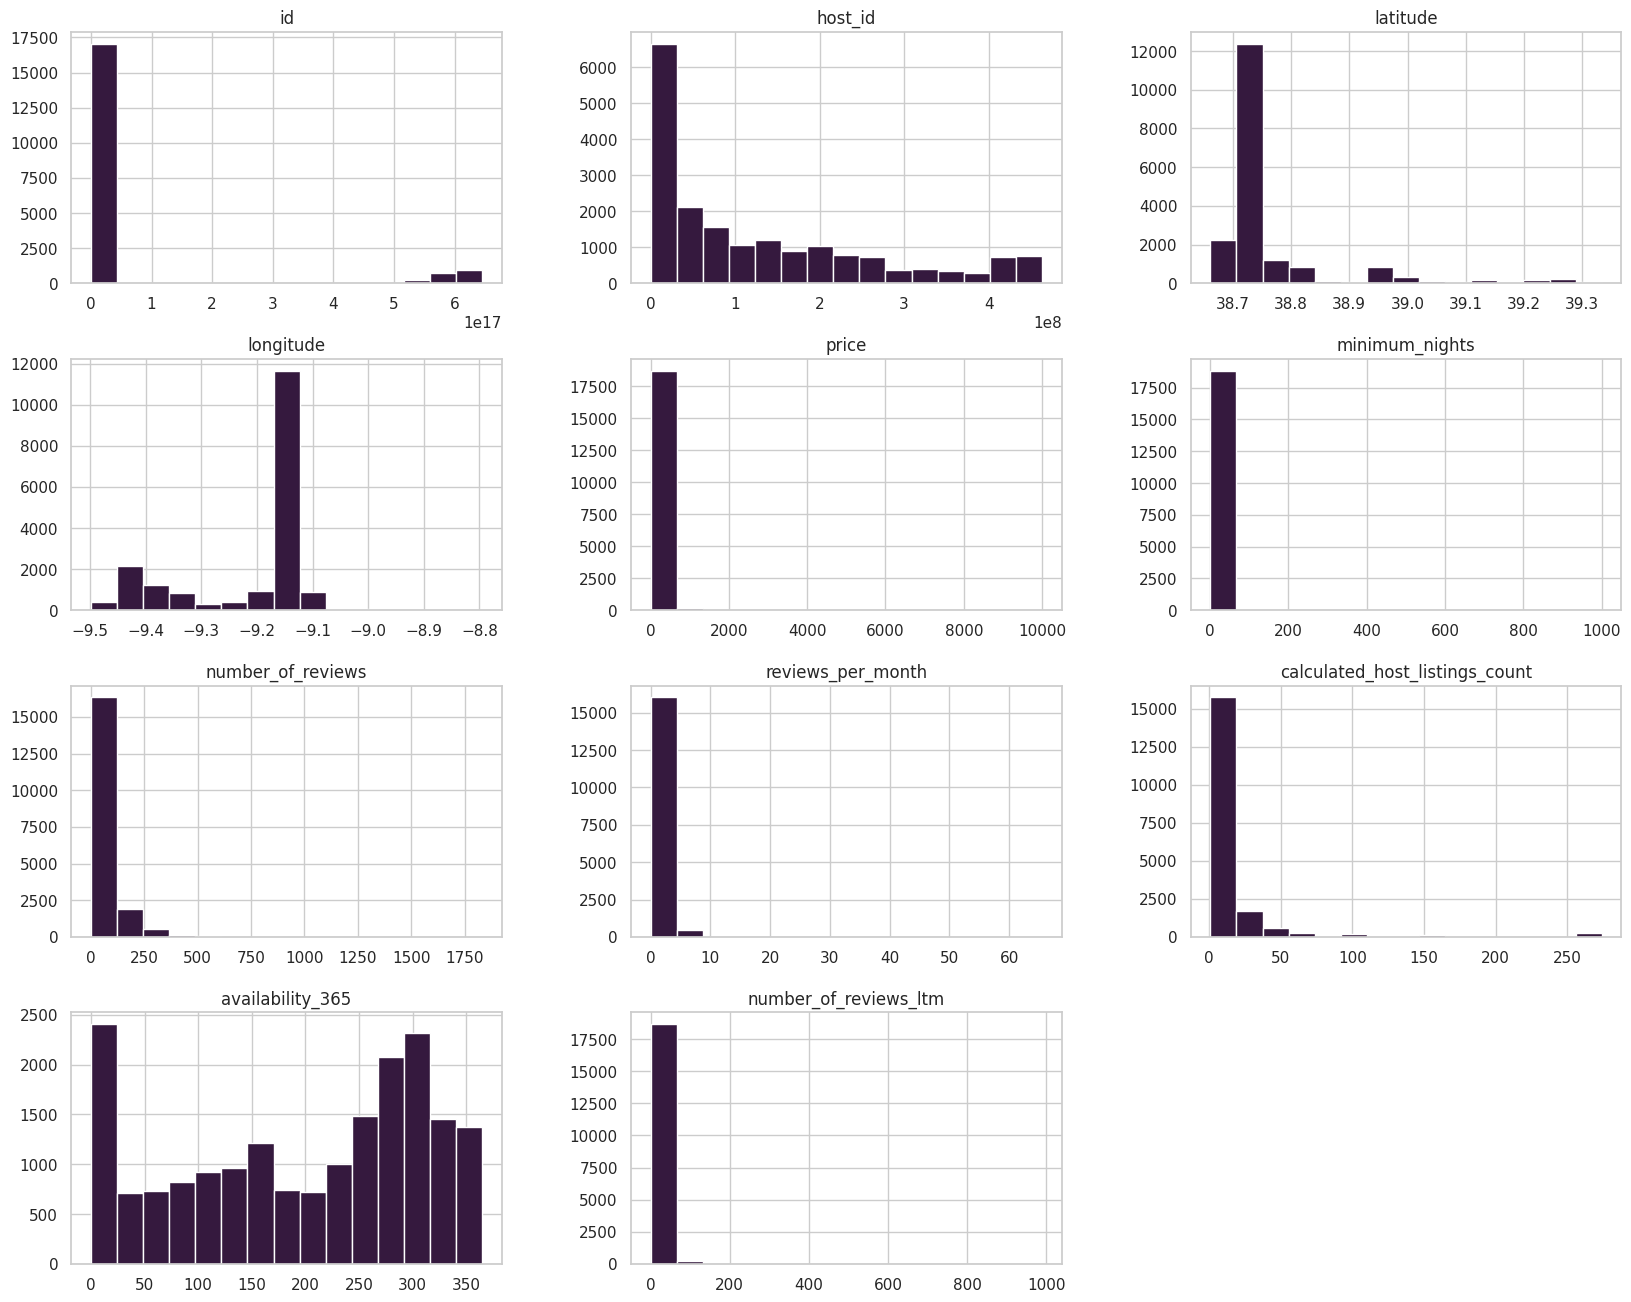

In [8]:
#Distribuição de variaveis
df.hist(bins=15, figsize=(20,16));

### **Q4. Qual a média dos preços de aluguel?**

In [13]:
avg_price = df['price'].mean()

print(f"Média de preços: R${avg_price:.2f}")

Média de preços: R$133.74


### **Q5. Qual o tipo de imóvel mais disponível no Booking?**

In [21]:
# Agrupar por tipo de imovel e somar as disponibilidades
imovel = df.groupby("room_type")["availability_365"].sum()

# Encontrar o tipo de imóvel com a maior disponibilidade
top_imovel = imovel.idxmax()
top_disponibilidade = imovel.max()

print(f"Tipo de imovel mais disponivel no Booking é o {top_imovel} com disponibilidade de ({top_disponibilidade:.2f} dias)")

Tipo de imóvel mais disponível no Booking é 'Entire home/apt' com disponibilidade total de 2820542.00 dias.


### **Q6. Qual a localidade mais cara?**



In [20]:
# Calcular o preço médio por localidade (bairro)
preco_medio_por_bairro = df.groupby("neighbourhood")["price"].mean()

# Identificar a localidade mais cara
bairro_mais_caro = preco_medio_por_bairro.idxmax()
preco_mais_caro = preco_medio_por_bairro.max()

# Exibir o resultado
print(
    f"A localidade mais cara é '{bairro_mais_caro}' "
    f"com preço médio de {preco_mais_caro:.2f} euros por noite."
)


A localidade mais cara é 'Ota' com preço médio de 375.00 euros por noite.


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [19]:
avg_nights = df['minimum_nights'].mean()

print(f"Média do minimo de noites é  {avg_nights:.2f} noites")

Média do minimo de noites é  4.26 noites
